In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
%matplotlib inline
from pathlib import Path
import pandas as pd
import scipy.stats as st
import matplotlib.pyplot as plt
from itertools import product


In [3]:
wrk = Path("../Resources/average_hours_worked_per_week.csv")
House_hold = Path("../Resources/Household.income 2.csv")
suicide = Path("../Resources/2015_suicide_rates.csv")
sal = Path("../Resources/data-tableusa.csv")
salperstate = Path("../Resources/h08.csv")

wrk_df = pd.read_csv(wrk, encoding="UTF-8")
House_hold_df = pd.read_csv(House_hold, encoding="UTF-8")
suicide_df = pd.read_csv(suicide, encoding="UTF-8")
#wrk_df.head()
House_hold_df.head()
#Annual_hours_df.head()
salarybyamount_df = pd.read_csv(sal, encoding="UTF-8")
salarybystate_df = pd.read_csv(salperstate, encoding="UTF-8")
salarybyamount_df.head()#actually suicide deaths per year


,YEAR,STATE,RATE,DEATHS,URL
0,2021,AL,15.8,827,/nchs/pressroom/states/alabama/al.htm
1,2021,AK,30.8,220,/nchs/pressroom/states/alaska/ak.htm
2,2021,AZ,19.5,1475,/nchs/pressroom/states/arizona/az.htm
3,2021,AR,20.6,618,/nchs/pressroom/states/arkansas/ar.htm
4,2021,CA,10.1,4148,/nchs/pressroom/states/california/ca.htm


In [4]:

# Selecting specific columns "Country", "Time", and "Value"
clean_wrk_df = wrk_df.iloc[11:16] 
clean_house_hold_df = House_hold_df[["State","2020 (41)","2019","2018","2017","2016"]]
columns = "State","2020","2019","2018","2017","2016"
clean_house_hold_df.columns = columns

clean_house_hold_df = clean_house_hold_df.drop(clean_house_hold_df.index[0])
clean_house_hold_df = clean_house_hold_df.drop(clean_house_hold_df.index[0])
clean_house_hold_df = clean_house_hold_df.set_index(clean_house_hold_df.columns[0])
clean_house_hold_df[["2020","2019","2018","2017","2016"]] = clean_house_hold_df[["2020","2019","2018","2017","2016"]].astype(float)
column = [["2020","2019","2018","2017","2016"]]

clean_house_hold_df.head()

#clean_house_hold_df = clean_house_hold_df.set_index(clean_house_hold_df.columns[0])
# Displaying the new DataFrame
clean_wrk_df.tail()
clean_house_hold_df.head()


,2020,2019,2018,2017,2016
State,,,,,
Alabama,54690.0,56200.0,49940.0,51110.0,47220.0
Alaska,74750.0,78390.0,68730.0,72230.0,75720.0
Arizona,67090.0,70670.0,62280.0,61130.0,57100.0
Arkansas,50780.0,54540.0,49780.0,48830.0,45910.0
California,77650.0,78110.0,70490.0,69760.0,66640.0


In [5]:
print(clean_wrk_df.columns)


Index(['U.S. average hours worked per week 2007-2022', 'Unnamed: 1'], dtype='object')


In [6]:


clean_wrk_df.columns = ["Year", "Average Weekly Worked Hours"]
clean_wrk_df = clean_wrk_df.reset_index()

clean_wrk_df


,index,Year,Average Weekly Worked Hours
0,11,2016,34.4
1,12,2017,34.4
2,13,2018,34.5
3,14,2019,34.4
4,15,2020,34.6


In [7]:
# Assuming 'column' is a 1D array or list containing the years
avg_hrs_wrk = pd.DataFrame({
    "Year": ["2016","2017", "2018", "2019", "2020"],
    "Average Household Income ($)": clean_wrk_df["Average Weekly Worked Hours"]
})


In [8]:
average_income_16 = float("{:.2f}".format(clean_house_hold_df['2016'].mean()))
average_income_20 = float("{:.2f}".format(clean_house_hold_df['2020'].mean()))
average_income_19 = float("{:.2f}".format(clean_house_hold_df['2019'].mean()))
average_income_18 = float("{:.2f}".format(clean_house_hold_df['2018'].mean()))
average_income_17 = float("{:.2f}".format(clean_house_hold_df['2017'].mean()))


In [9]:
print(type(average_income_16))
print(type(average_income_20))
print(type(average_income_19))
print(type(average_income_18))
print(type(average_income_17))


<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>
<class 'float'>


In [10]:
us_average_income = pd.DataFrame({
    "Year": ["2016","2017", "2018", "2019", "2020"],
    "Average Household Income ($)": [average_income_16, average_income_17, average_income_18, average_income_19, average_income_20]
})

In [11]:
us_average_income

,Year,Average Household Income ($)
0,2016,59179.61
1,2017,61640.59
2,2018,64411.18
3,2019,69720.59
4,2020,68660.39


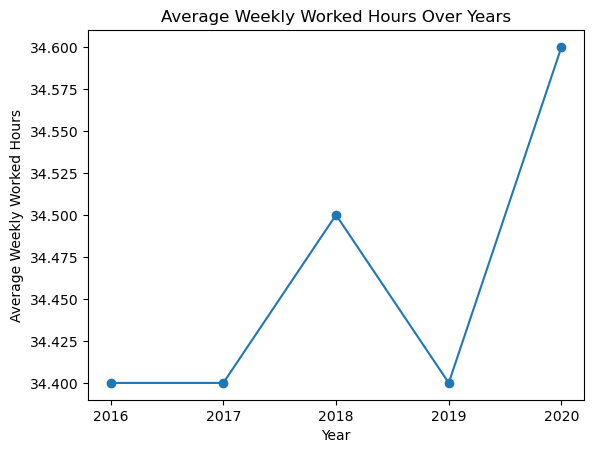

In [12]:
# Assuming clean_wrk_df['Year'] and clean_wrk_df['Average Weekly Worked Hours'] are DataFrame columns
# Convert the numpy array to a list
year_list = clean_wrk_df['Year']

# Plot the data
plt.plot(avg_hrs_wrk["Year"], avg_hrs_wrk["Average Household Income ($)"], marker='o', linestyle='-')

# Set y-axis limits and ticks


# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Weekly Worked Hours')
plt.title('Average Weekly Worked Hours Over Years')
plt.savefig('../Visuals/average_weekly_hours_worked.png')
# Show the plot
plt.show()

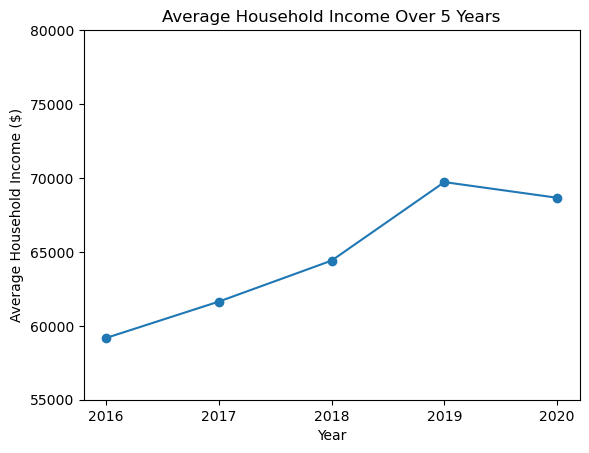

In [13]:
# Plot the data
plt.plot(us_average_income['Year'], us_average_income['Average Household Income ($)'], marker='o', linestyle='-')

# Set y-axis limits and ticks
plt.ylim(55000, 80000)
plt.yticks(range(55000, 80001, 5000))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Average Household Income ($)')
plt.title('Average Household Income Over 5 Years')
plt.savefig('../Visuals/average_household_income.png')
# Show the plot
plt.show()

In [14]:
print(suicide_df.columns)
suicide_df



Index(['LOCATION', 'INDICATOR', 'SUBJECT', 'MEASURE', 'FREQUENCY', 'TIME',
       'Value', 'Flag Codes'],
      dtype='object')


,LOCATION,INDICATOR,SUBJECT,MEASURE,FREQUENCY,TIME,Value,Flag Codes
0,AUS,SUICIDE,TOT,100000PER,A,2015,13.2,NaN
1,AUS,SUICIDE,TOT,100000PER,A,2016,12.2,NaN
2,AUS,SUICIDE,TOT,100000PER,A,2017,13.6,NaN
3,AUS,SUICIDE,TOT,100000PER,A,2018,13.0,NaN
4,AUS,SUICIDE,TOT,100000PER,A,2019,13.5,NaN
...,...,...,...,...,...,...,...,...
232,ROU,SUICIDE,TOT,100000PER,A,2015,10.9,NaN
233,ROU,SUICIDE,TOT,100000PER,A,2016,9.6,NaN
234,ROU,SUICIDE,TOT,100000PER,A,2017,9.4,NaN
235,ROU,SUICIDE,TOT,100000PER,A,2018,9.5,NaN


In [15]:
suicide_df = suicide_df[["LOCATION", "INDICATOR", "SUBJECT", "MEASURE", "TIME", "Value"]]
suicide_df.columns = ["Country","Indicator", "Subject","Measure", "Year", "Value"]
suicide_df.head()

,Country,Indicator,Subject,Measure,Year,Value
0,AUS,SUICIDE,TOT,100000PER,2015,13.2
1,AUS,SUICIDE,TOT,100000PER,2016,12.2
2,AUS,SUICIDE,TOT,100000PER,2017,13.6
3,AUS,SUICIDE,TOT,100000PER,2018,13.0
4,AUS,SUICIDE,TOT,100000PER,2019,13.5


In [16]:
usa_suicide_rates = suicide_df[suicide_df["Country"] == "USA"]
usa_suicide_rates.reset_index(drop=True, inplace=True)

usa_suicide_rates.head()

,Country,Indicator,Subject,Measure,Year,Value
0,USA,SUICIDE,TOT,100000PER,2015,14.0
1,USA,SUICIDE,TOT,100000PER,2016,14.2
2,USA,SUICIDE,TOT,100000PER,2017,14.8
3,USA,SUICIDE,TOT,100000PER,2018,15.0
4,USA,SUICIDE,TOT,100000PER,2019,14.7


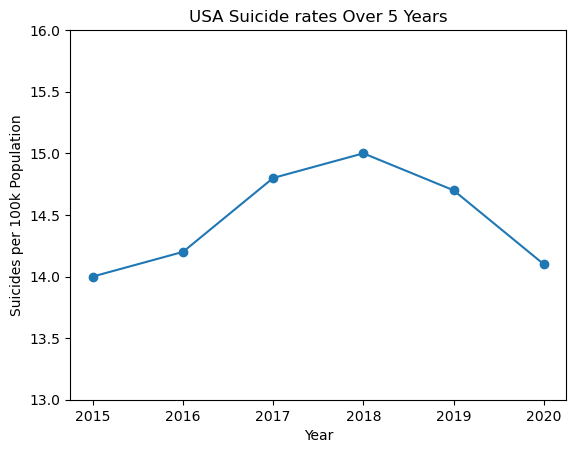

In [17]:
# Plot the data
plt.plot(usa_suicide_rates['Year'], usa_suicide_rates['Value'], marker='o', linestyle='-')

# Set y-axis limits and ticks
plt.ylim(13, 16)
#plt.yticks(range(55000, 80001, 5000))

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('USA Suicide rates Over 5 Years')
plt.savefig('../Visuals/usa_suicide_rates.png')
# Show the plot
plt.show()

In [18]:
# Check the data types of columns in suicide_df
suicide_df_dtypes = suicide_df.dtypes
print(suicide_df_dtypes)


Country       object
Indicator     object
Subject       object
Measure       object
Year           int64
Value        float64
dtype: object


In [19]:
world_suicide_df = suicide_df[suicide_df['Country'] != 'USA']
world_suicide_df.reset_index(drop=True, inplace=True)
world_suicide_df.head()


,Country,Indicator,Subject,Measure,Year,Value
0,AUS,SUICIDE,TOT,100000PER,2015,13.2
1,AUS,SUICIDE,TOT,100000PER,2016,12.2
2,AUS,SUICIDE,TOT,100000PER,2017,13.6
3,AUS,SUICIDE,TOT,100000PER,2018,13.0
4,AUS,SUICIDE,TOT,100000PER,2019,13.5


In [20]:
# Check the data types of columns
print(world_suicide_df.dtypes)


Country       object
Indicator     object
Subject       object
Measure       object
Year           int64
Value        float64
dtype: object


In [21]:
# Group the DataFrame by the "Year" column and calculate the mean
world_suicide_avg = world_suicide_df[["Year","Value"]]
#average_by_year = suicide_df.groupby("Year").mean()

# Display the resulting DataFrame
#print(average_by_year)
world_suicide_avg


,Year,Value
0,2015,13.2
1,2016,12.2
2,2017,13.6
3,2018,13.0
4,2019,13.5
...,...,...
226,2015,10.9
227,2016,9.6
228,2017,9.4
229,2018,9.5


In [22]:
# Calculate the average suicide rate for all countries together by year
average_by_year_w = world_suicide_avg.groupby(["Year"]).mean()
average_by_year_w.reset_index(inplace=True)


# Display the resulting DataFrame
average_by_year_w.head()


,Year,Value
0,2015,11.390698
1,2016,10.669767
2,2017,10.735000
3,2018,10.507895
4,2019,10.494595


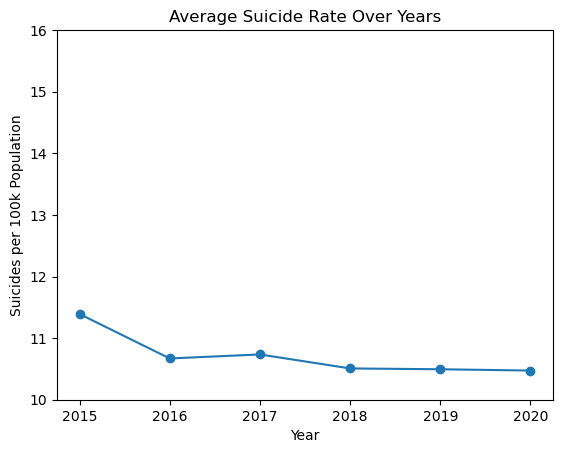

In [23]:

# Plot the data
plt.plot(average_by_year_w["Year"], average_by_year_w['Value'], marker='o', linestyle='-')

# Set y-axis limits and ticks
plt.ylim(10, 16)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('Average Suicide Rate Over Years')
plt.savefig('../Visuals/average_world_suicide_rate_comparison.png')
# Show the plot
plt.show()


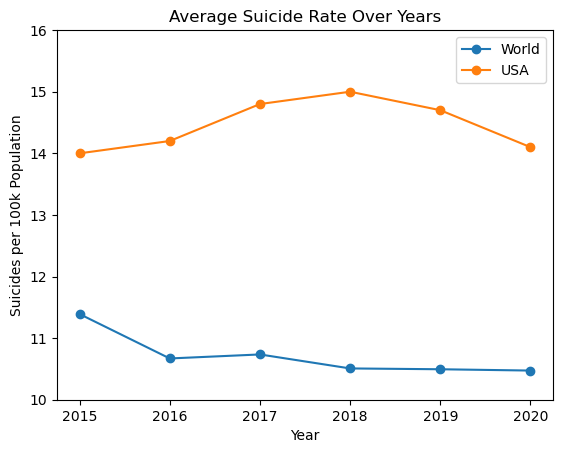

In [24]:


# Plot the data for average suicide rate
plt.plot(average_by_year_w["Year"], average_by_year_w['Value'], marker='o', linestyle='-', label='World')

# Plot the data for USA suicide rate
plt.plot(usa_suicide_rates['Year'], usa_suicide_rates['Value'], marker='o', linestyle='-', label='USA')

# Set y-axis limits and ticks
plt.ylim(10, 16)

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Suicides per 100k Population')
plt.title('Average Suicide Rate Over Years')

# Add legend
plt.legend()
plt.savefig('../Visuals/suicide_rate_comparison.png')
# Show the plot
plt.show()



In [25]:
salarybyamount_df = salarybyamount_df.iloc[:, :-1]

# Alternatively, you can use the drop method
# df = df.drop(df.columns[-1], axis=1)

# Display the DataFrame after deleting the last column
filtered_df = salarybyamount_df[(salarybyamount_df['YEAR'] >= 2015) & (salarybyamount_df['YEAR'] <= 2020)]

print(filtered_df)

     YEAR STATE  RATE DEATHS
50   2020    AL  16.0    793
51   2020    AK  27.5    204
52   2020    AZ  17.6   1363
53   2020    AR  19.0    583
54   2020    CA  10.0   4144
..    ...   ...   ...    ...
345  2015    VA  12.7  1,118
346  2015    WA  15.4  1,137
347  2015    WV  17.4    340
348  2015    WI  14.7    877
349  2015    WY  28.0    157

[300 rows x 4 columns]


In [26]:
filtered_df = salarybyamount_df[(salarybyamount_df['YEAR'] >= 2015) & (salarybyamount_df['YEAR'] <= 2020)]
filtered_df


,YEAR,STATE,RATE,DEATHS
50,2020,AL,16.0,793
51,2020,AK,27.5,204
52,2020,AZ,17.6,1363
53,2020,AR,19.0,583
54,2020,CA,10.0,4144
...,...,...,...,...
345,2015,VA,12.7,"1,118"
346,2015,WA,15.4,"1,137"
347,2015,WV,17.4,340
348,2015,WI,14.7,877


In [41]:
print(filtered_df.info())
columns_to_convert1 = ["DEATHS"]
filtered_df[columns_to_convert1] = filtered_df[columns_to_convert1].apply(pd.to_numeric, errors='coerce')
print(filtered_df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 50 to 349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    300 non-null    int64  
 1   STATE   300 non-null    object 
 2   RATE    300 non-null    float64
 3   DEATHS  250 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
Index: 300 entries, 50 to 349
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   YEAR    300 non-null    int64  
 1   STATE   300 non-null    object 
 2   RATE    300 non-null    float64
 3   DEATHS  250 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 11.7+ KB
None


In [27]:
salarybystate_df

,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 65,Unnamed: 66,Unnamed: 67,Unnamed: 68,Unnamed: 69,Unnamed: 70,Unnamed: 71,Unnamed: 72,Unnamed: 73,Unnamed: 74
0,Table H-8. Median Household Income by State: ...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,(Households as of March of the following year....,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,CURRENT DOLLARS,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,State,2020,NaN,2019,NaN,2018,NaN,2017,NaN,2016,...,1988,NaN,1987 (21),NaN,1986,NaN,1985 (20),NaN,1984 (19),NaN
4,NaN,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,...,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror,Median\nincome,Standard\nerror
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
110,Wisconsin,"62,629","2,039","65,029","2,979","64,998","3,763","62,593","1,931","58,745",...,"60,525","2,001","55,913","2,990","57,970","1,761","51,879","2,591","47,882","1,895"
111,Wyoming,"62,539","3,892","60,987","3,262","59,247","3,210","60,513","3,267","64,575",...,"54,066","2,241","58,502","3,092","51,673","1,893","49,279","2,341","54,976","1,687"
112,"Source: U.S. Bureau of the Census, Current Pop...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
113,Footnotes are available at <www.census.gov/top...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [28]:
salarybystate_df = salarybystate_df.iloc[6:111, :13]
salarybystate_df


,"Table with row headers in column A and column headers in rows 5 and 6, and 60 and 61",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
6,Alabama,"49,936","2,423","50,865","1,094","51,113",845,"47,221","2,301","44,509","3,419","42,278","1,529"
7,Alaska,"68,734","3,390","77,987","3,718","72,231","2,719","75,723","4,086","75,112","3,485","67,629","3,153"
8,Arizona,"62,283","2,291","59,700","2,689","61,125","2,642","57,100","1,971","52,248","2,008","49,254","2,304"
9,Arkansas,"49,781","2,108","49,751","2,491","48,829","2,642","45,907","2,165","42,798","1,572","44,922","2,546"
10,California,"70,489","1,233","70,038","1,576","69,759","1,452","66,637","1,075","63,636","1,711","60,487",894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,Vermont,"70,066","2,350","65,234","3,389","65,360","3,209","63,660","1,427","63,058","2,779","64,455","3,289"
107,Virginia,"77,151","3,086","72,537","3,898","73,031","3,356","69,535","2,549","65,169","2,585","70,239","3,128"
108,Washington,"79,726","3,025","73,284","2,176","77,256","3,388","73,573","2,189","71,271","3,448","62,714","2,330"
109,West Virginia,"50,573","1,337","48,102","1,308","46,499","1,521","46,412","2,087","45,389","3,320","41,993","2,330"


In [29]:
new_column_names = ['State', '2020 median', '2020 standard error', '2019 median', '2019 standard error','2018 median', '2018 standard error','2017 median', '2017 standard error','2016 median', '2016 standard error','2015 median', '2015 standard error',]

# Rename the columns
salarybystate_df.columns = new_column_names


In [31]:
salarybystate_df
salarybystate_df = salarybystate_df.reset_index(drop=True)
salarybystate_df

,State,2020 median,2020 standard error,2019 median,2019 standard error,2018 median,2018 standard error,2017 median,2017 standard error,2016 median,2016 standard error,2015 median,2015 standard error
0,Alabama,"49,936","2,423","50,865","1,094","51,113",845,"47,221","2,301","44,509","3,419","42,278","1,529"
1,Alaska,"68,734","3,390","77,987","3,718","72,231","2,719","75,723","4,086","75,112","3,485","67,629","3,153"
2,Arizona,"62,283","2,291","59,700","2,689","61,125","2,642","57,100","1,971","52,248","2,008","49,254","2,304"
3,Arkansas,"49,781","2,108","49,751","2,491","48,829","2,642","45,907","2,165","42,798","1,572","44,922","2,546"
4,California,"70,489","1,233","70,038","1,576","69,759","1,452","66,637","1,075","63,636","1,711","60,487",894
...,...,...,...,...,...,...,...,...,...,...,...,...,...
100,Vermont,"70,066","2,350","65,234","3,389","65,360","3,209","63,660","1,427","63,058","2,779","64,455","3,289"
101,Virginia,"77,151","3,086","72,537","3,898","73,031","3,356","69,535","2,549","65,169","2,585","70,239","3,128"
102,Washington,"79,726","3,025","73,284","2,176","77,256","3,388","73,573","2,189","71,271","3,448","62,714","2,330"
103,West Virginia,"50,573","1,337","48,102","1,308","46,499","1,521","46,412","2,087","45,389","3,320","41,993","2,330"


In [34]:
newsalarybystate_df = salarybystate_df[["State", "2020 median", "2019 median", "2018 median", "2017 median", "2016 median", "2015 median"]]
newsalarybystate_df

,State,2020 median,2019 median,2018 median,2017 median,2016 median,2015 median
0,Alabama,"49,936","50,865","51,113","47,221","44,509","42,278"
1,Alaska,"68,734","77,987","72,231","75,723","75,112","67,629"
2,Arizona,"62,283","59,700","61,125","57,100","52,248","49,254"
3,Arkansas,"49,781","49,751","48,829","45,907","42,798","44,922"
4,California,"70,489","70,038","69,759","66,637","63,636","60,487"
...,...,...,...,...,...,...,...
100,Vermont,"70,066","65,234","65,360","63,660","63,058","64,455"
101,Virginia,"77,151","72,537","73,031","69,535","65,169","70,239"
102,Washington,"79,726","73,284","77,256","73,573","71,271","62,714"
103,West Virginia,"50,573","48,102","46,499","46,412","45,389","41,993"


In [36]:
print(newsalarybystate_df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 105 entries, 0 to 104
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   State        104 non-null    object
 1   2020 median  104 non-null    object
 2   2019 median  104 non-null    object
 3   2018 median  104 non-null    object
 4   2017 median  104 non-null    object
 5   2016 median  104 non-null    object
 6   2015 median  104 non-null    object
dtypes: object(7)
memory usage: 5.9+ KB
None


In [37]:
# Convert selected columns to numeric data type
columns_to_convert = ["2020 median", "2019 median", "2018 median", "2017 median", "2016 median", "2015 median"]
newsalarybystate_df[columns_to_convert] = newsalarybystate_df[columns_to_convert].apply(pd.to_numeric, errors='coerce')


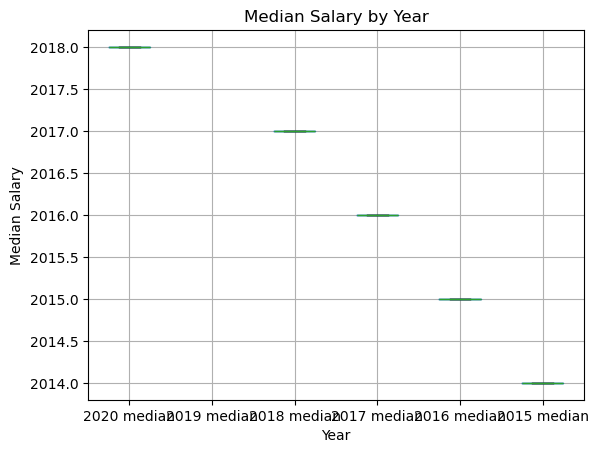

In [38]:
# Create a boxplot
newsalarybystate_df.boxplot(column=["2020 median", "2019 median", "2018 median", "2017 median", "2016 median", "2015 median"])

# Add labels and title
plt.xlabel('Year')
plt.ylabel('Median Salary')
plt.title('Median Salary by Year')

# Show the plot
plt.show()

KeyError: 'Column not found: Salary'

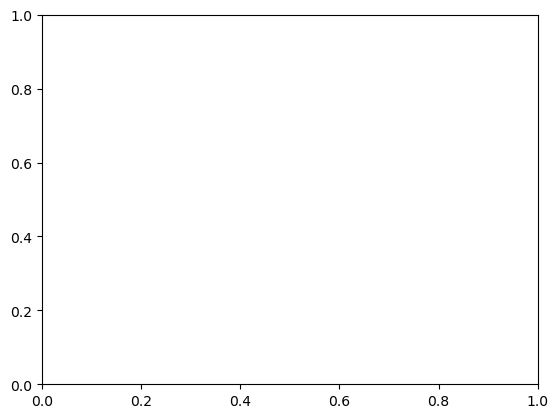

In [43]:
combined_df = pd.concat([newsalarybystate_df, filtered_df])
# Create a boxplot
combined_df.boxplot(column=['Salary'], by='State')

# Set plot labels and title
plt.xlabel('State')
plt.ylabel('Salary')
plt.title('Boxplot of Salary by State')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.show()